In [1]:
%load_ext autoreload
%autoreload 2

# Scan and detect

Scanning imaging modes such as STEM works by scanning an electron probe across a sample and recording the scattering signal. In abTEM, the manner in which the signal is detected is controlled by the detector objects. There is five different types of detectors, each will be described in the following.

In [2]:
from abtem.waves import ProbeWaves

probe = ProbeWaves(sampling=.05, 
                   extent=10, 
                   energy=60e3, 
                   semiangle_cutoff=.03, 
                   focal_spread=30,
                   defocus=50)

probe



## Annular detector
The `AnnularDetector` can be used for simulating the typical modes of STEM, i.e. bright field and annular dark field measurements. The only difference between these are the inner and outer radial integration limits, below we create a detector representing each mode 

In [1]:
from abtem.detect import AnnularDetector

bright = AnnularDetector(inner=.0, outer=.02, extent=10, sampling=.05, energy=200e3)
maadf = AnnularDetector(inner=.05, outer=.086, extent=10, sampling=.05, energy=200e3)
haadf = AnnularDetector(inner=.086, outer=.19, extent=10, sampling=.05, energy=200e3)

As noted in tutorial, abTEM is generally smart enough to infer the grid and energy from context. However, plotting the integration region as below requires us to explicitly set these values.

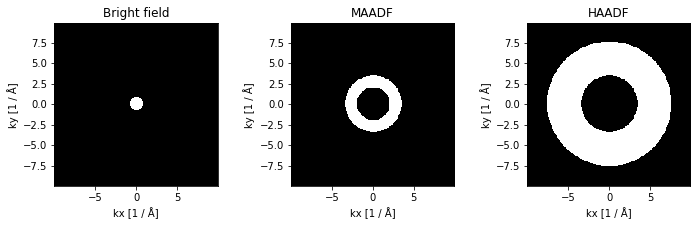

In [2]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,3))

bright.get_integration_region().plot(ax=ax1, title='Bright field')
maadf.get_integration_region().plot(ax=ax2, title='MAADF')
haadf.get_integration_region().plot(ax=ax3, title='HAADF');

As noted in an earlier tutorial, the sampling should be fine enough, that the maximum spatial frequency is twice the outer integration limit. Let's fix this by decreasing the pixel size

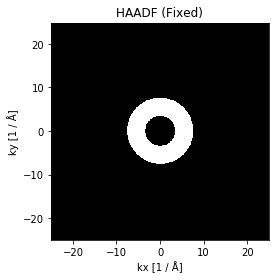

In [3]:
haadf.sampling = .02
haadf.get_integration_region().plot(title='HAADF (Fixed)');

## Custom detector

However,   current   detector   hardware   is   far   from   perfect   with   detectorsexhibiting significant asymmetries or non-uniformities across their active region
The `CustomDetector` allows the user to set the detector efficiency using an array, e.g. representing a measured detector efficiency.